# STEP 2 EDA

## Spanish, Portuguese, Italian and French

### Exploratory Data Analysis of the Audioclips per language

In [1]:
# Uncomment these lines if you need to install or update these packages
# !pip install --upgrade librosa
# !pip install --upgrade soundfile

#We strongly recommend to update ffmpeg library

In [6]:
import os
import random
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
import numpy as np
from glob import glob
import IPython.display as ipd

In [7]:
def exploring_audio(language_mp3_path, analysis_window_length, language_dic):
    """
    This function samples mp3 files and analyzes the dataset content.
    """

    language_list = os.listdir(language_mp3_path)

    for language in language_list:
        language_path = os.path.join(language_mp3_path, language)

        # Skip non-directory items
        if not os.path.isdir(language_path):
            continue

        if language not in language_dic:
            print(f"Skipping language {language} because it is not in language_dic")
            continue

        language_name = language_dic.get(language, "Unknown language!")

        clips_path = os.path.join(language_path, "clips")
        # get a list of all files in the folder
        mp3_list = os.listdir(clips_path)
        # choose a random file from the list
        random_file = random.choice(mp3_list)
        mp3_path = os.path.join(clips_path, random_file)

        # Try to read the audio file
        try:
            y, sr = sf.read(mp3_path)
        except Exception as e:
            print(f"Error reading {mp3_path}: {e}")
            continue

        # Compute MFCC
        hop_length = int(analysis_window_length * sr)

        # Plot raw waveform
        plt.figure(figsize=(16, 6))
        librosa.display.waveshow(y=y, sr=sr, x_axis="s")
        plt.title("Digital Audio waves in " + language_name, fontsize=20)
        plt.show()

        # Summary information
        print(f"Sample rate of the clip (KHz): {sr}")
        # Verify length of the audio
        print(f"Duration of the clip: {int(len(y))/int(sr)}")
        print('\n')

        # transform y into melspectogram represenation
        y_melspec = librosa.amplitude_to_db(np.abs(librosa.stft(y) ), ref=np.max)
        # plot melspectogram
        plt.figure(figsize = (16, 6))
        librosa.display.specshow(y_melspec, sr = sr, hop_length = hop_length, x_axis = "time", y_axis = "log")
        plt.colorbar()
        plt.title("Mel Spectogram " + language_name, fontsize = 20)
        plt.show()

        # transform y into MFCC represenation
        y_mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length = hop_length)
        # plot MFCC
        plt.figure(figsize = (16, 6))
        librosa.display.specshow(y_mfcc, sr = sr, hop_length = hop_length, x_axis = "time", y_axis = "log")
        plt.colorbar()
        plt.title("MFCC " + language_name, fontsize = 20)
        plt.show()

        # Check if the audio signal is non-empty
        if len(y) > 0:
            # Audio analysis and plotting code here...

            # Total duration and clip duration code:
            max_clip = -1
            min_clip = float("inf")
            duration_sec = 0.0

            all_files = glob(clips_path + "/*.mp3")

            for file in all_files:
                y, sr = librosa.load(file)  # Load the audio data
                file_duration = librosa.get_duration(y=y, sr=sr)
                duration_sec += file_duration

                if max_clip < file_duration:
                    max_clip = file_duration

                if min_clip > file_duration:
                    min_clip = file_duration

            duration_h = duration_sec / 60.0 / 60.0
            print("Total duration of " + language_name + " is " + str(round(duration_h, 1)) + " h")
            print(f"Number of clips in {language_name}: {len(mp3_list)}")
            print(f"The duration of the largest clip is: {max_clip}")
            print(f"The duration of the shortest clip is: {min_clip}")
            print('\n')
            print("*" * 120)
            print('\n')

        else:
            print(f"Skipping {random_file} because it has no samples.")
            
              # Check if the audio signal is non-empty
        print(f"Playing a random file in {language_name}: {random_file}")
        ipd.Audio(mp3_path)

In [8]:
#Parameters for all exploration
language_dic = {"es" : "Spanish" , "pt": "Portuguese", "it": "Italian" }
analysis_window_length = 0.01  # 10 ms in seconds
language_mp3_path = "/language_detector/languages"

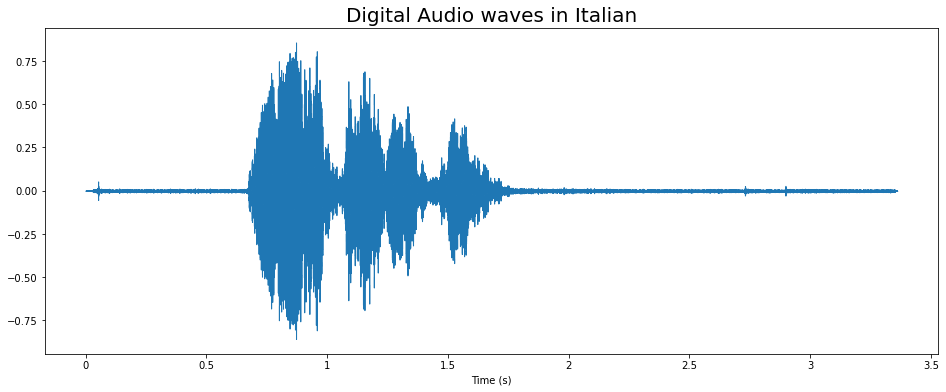

Sample rate of the clip (KHz): 48000
Duration of the clip: 3.36




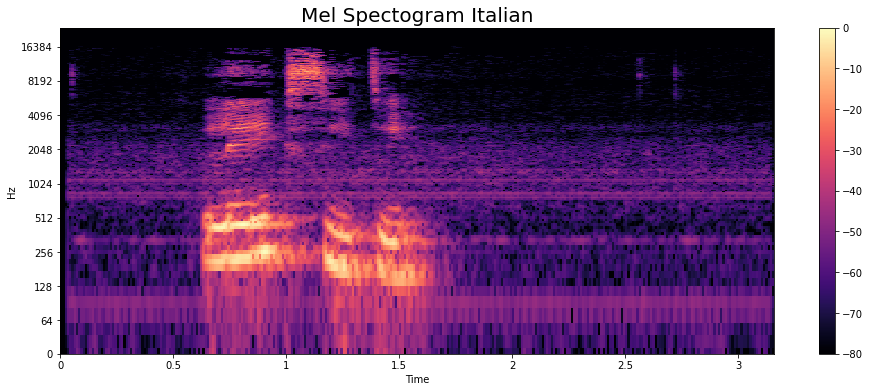

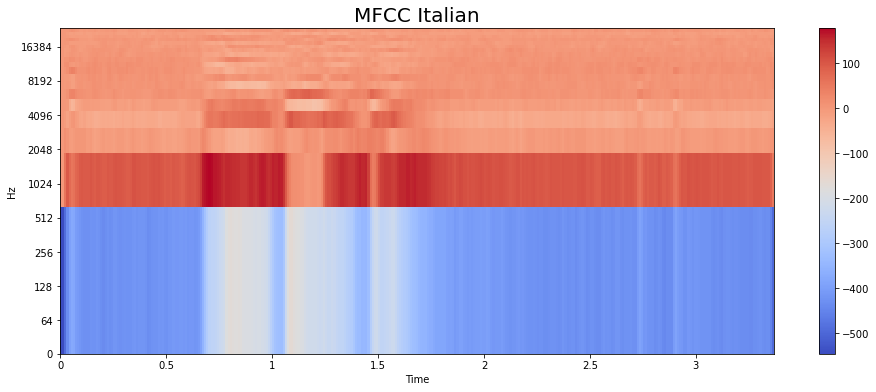

Total duration of Italian is 26.3 h
Number of clips in Italian: 17000
The duration of the largest clip is: 25.896009070294784
The duration of the shortest clip is: 0.6960090702947845


************************************************************************************************************************


Playing a random file in Italian: common_voice_it_19976994.mp3
Skipping language ja because it is not in language_dic


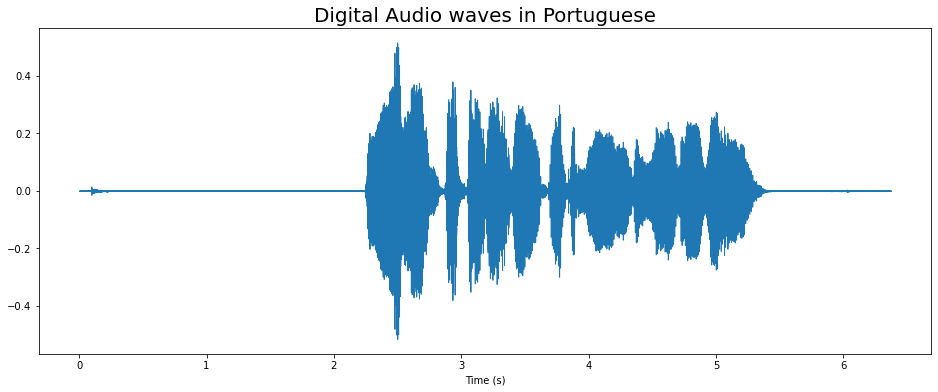

Sample rate of the clip (KHz): 32000
Duration of the clip: 6.372




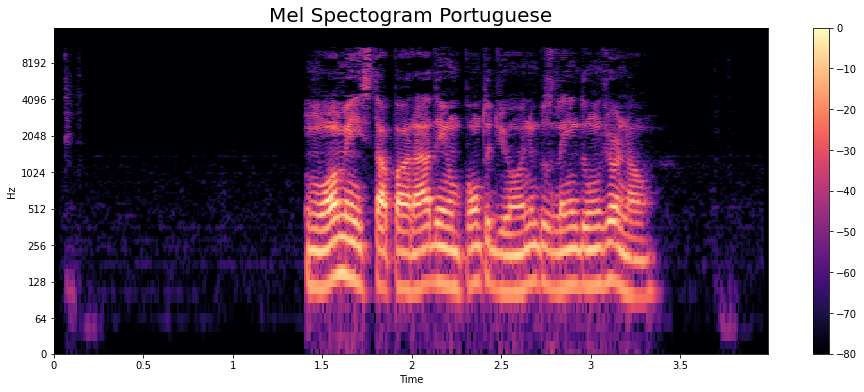

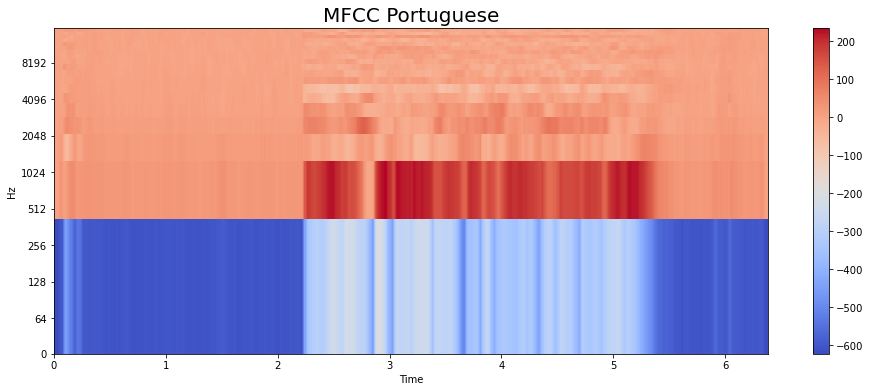

Total duration of Portuguese is 16.4 h
Number of clips in Portuguese: 15033
The duration of the largest clip is: 10.584036281179138
The duration of the shortest clip is: 0.07201814058956917


************************************************************************************************************************


Playing a random file in Portuguese: common_voice_pt_36607375.mp3
Skipping language ro because it is not in language_dic
Skipping language fr because it is not in language_dic
Skipping language de because it is not in language_dic


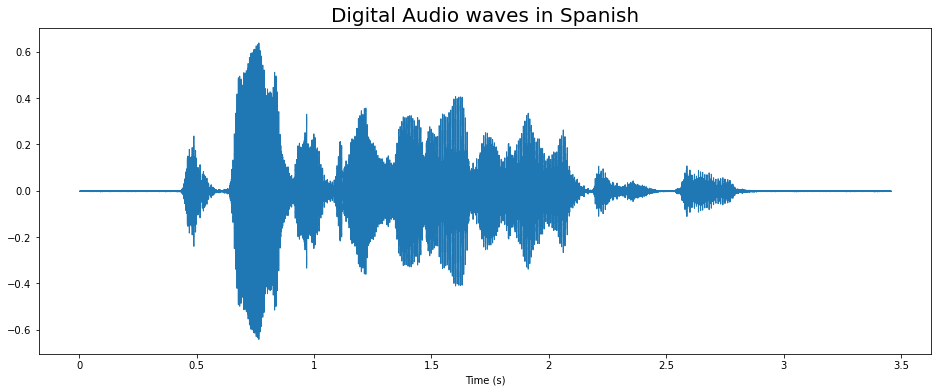

Sample rate of the clip (KHz): 32000
Duration of the clip: 3.456




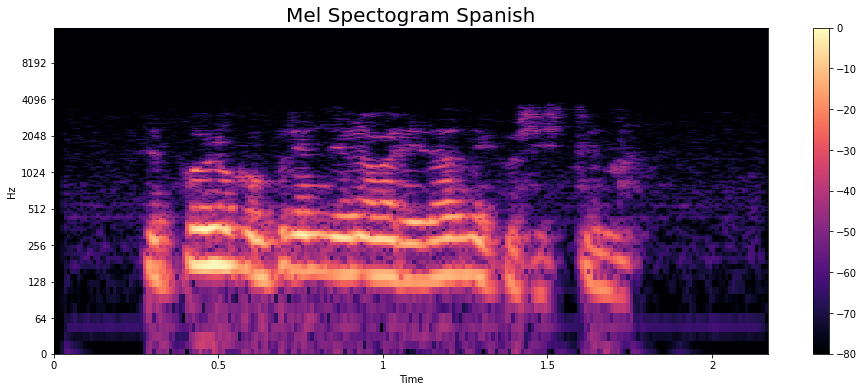

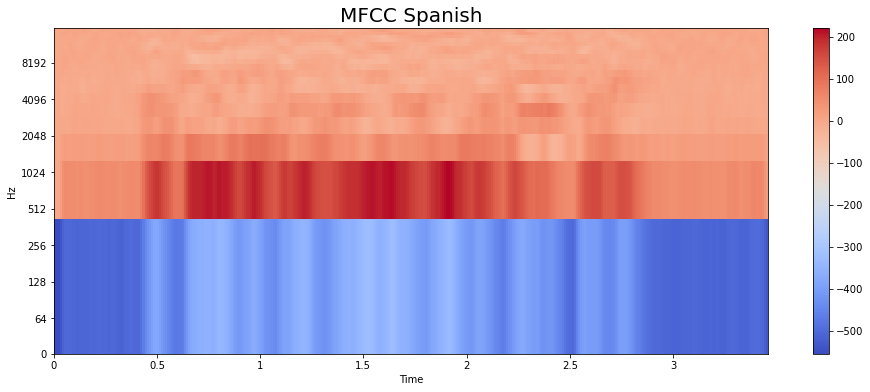

Total duration of Spanish is 24.0 h
Number of clips in Spanish: 17619
The duration of the largest clip is: 11.808027210884354
The duration of the shortest clip is: 1.5480272108843538


************************************************************************************************************************


Playing a random file in Spanish: common_voice_es_36628867.mp3
Skipping language ca because it is not in language_dic


In [9]:
exploring_audio(language_mp3_path, analysis_window_length, language_dic)